In [2]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest


In [8]:
df=pd.read_csv("/Users/Tanvi/Desktop/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [72]:
for i in df.columns: 
    if  df[i].isnull().any():
        print('{0} has {1} null values'.format(i,df[i].isnull().sum()))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [ ]:
feature_s = df.drop(['target'],axis=1)
y = df['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(feature_s, y, test_size=0.3, random_state=7)

In [65]:
#FEATURE SELECTION USING MUTUAL CLASSIFIER
def select_features(X_train, y_train, X_test):
 K_best = SelectKBest(score_func=mutual_info_classif, k='all')
 K_best.fit(X_train, y_train)
 X_train_fscore = K_best.transform(X_train)
 X_test_fscore = K_best.transform(X_test)S
 return X_train_fscore, X_test_fscore,K_best


In [66]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [69]:
from matplotlib import pyplot
 
for i in range(len(fs.scores_)):
 #ram = K_Best.scores_[i]>0.5
 print('Feature %d: %f' % (i, fs.scores_[i]>0.02))


Feature 0: 0.000000
Feature 1: 1.000000
Feature 2: 1.000000
Feature 3: 0.000000
Feature 4: 1.000000
Feature 5: 0.000000
Feature 6: 1.000000
Feature 7: 1.000000
Feature 8: 1.000000
Feature 9: 1.000000
Feature 10: 0.000000
Feature 11: 1.000000
Feature 12: 1.000000


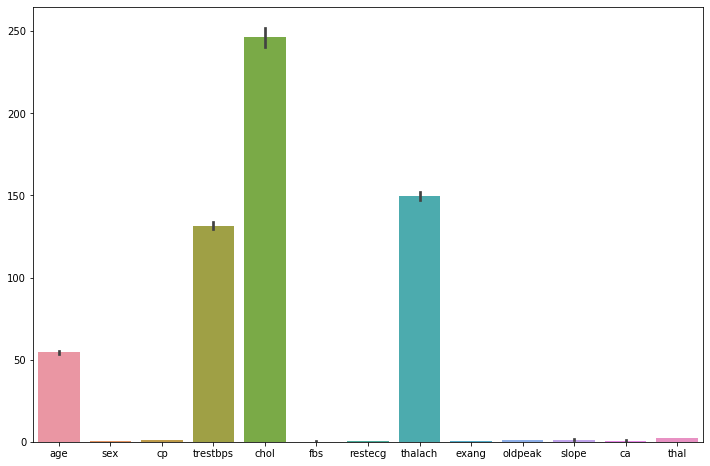

In [68]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=feature_s

In [25]:
feature_s.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

(14.0, 0.0)

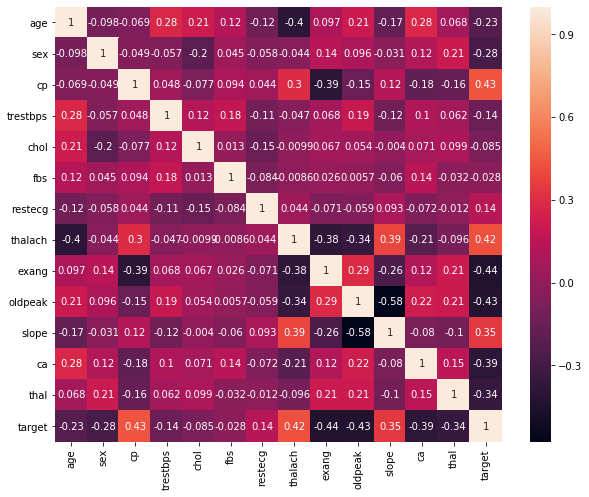

In [77]:
#Correlation
plt.rcParams['figure.figsize'] = (10, 8)
df_corr = df.corr()
ax = sns.heatmap(df_corr, annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

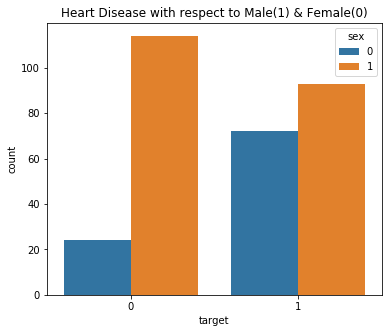

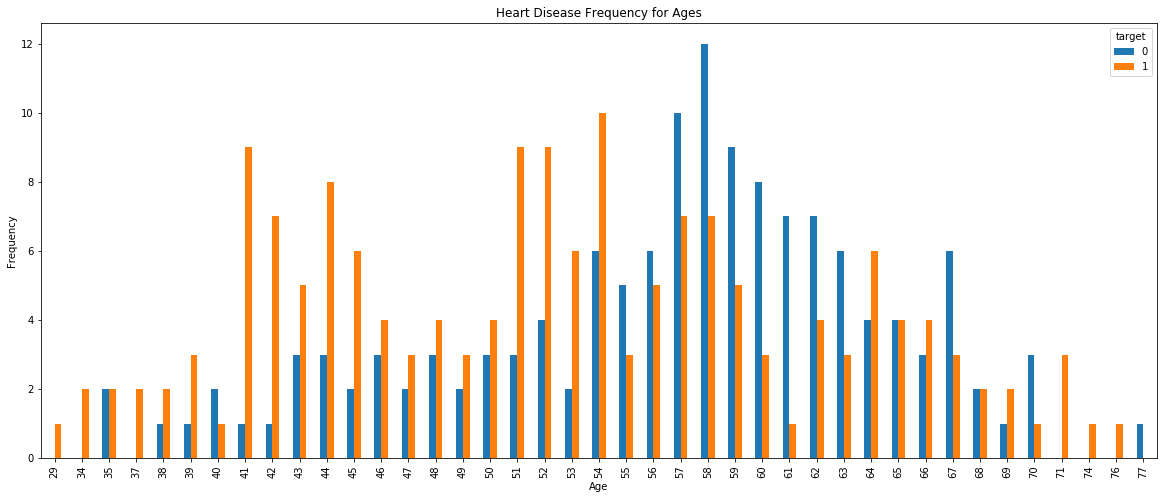

Text(0.5, 1.0, 'Heart Disease frequency to Chest pain types')

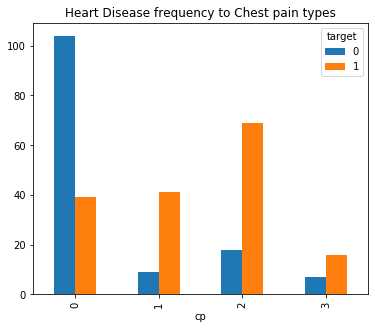

In [79]:
import pandas as pd
import numpy as np

def query(Gender):
    
    print("Female Patients:{:.2f}%".format((female/(len(df.sex))*100)))
    print("Male Patients:{:.2f}%".format((male/(len(df.sex))*100)))


df=pd.read_csv("/Users/Tanvi/Desktop/heart.csv")
plt.rcParams['figure.figsize'] = (6, 5)
plt.title('Heart Disease with respect to Male(1) & Female(0)')
Gender = sns.countplot(x='target',hue='sex',data = df)

female=len(df[df.sex == 0])
male=len(df[df.sex == 1])

pd.crosstab(df.age,df.target).plot(kind ="bar",figsize=(20,8))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

cp = pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title('Heart Disease frequency to Chest pain types')


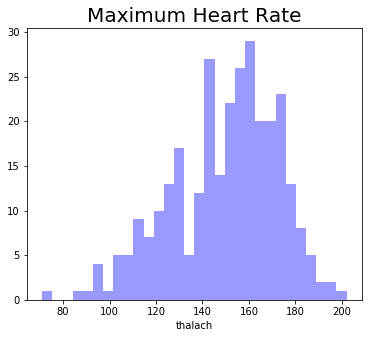

<Figure size 576x432 with 0 Axes>

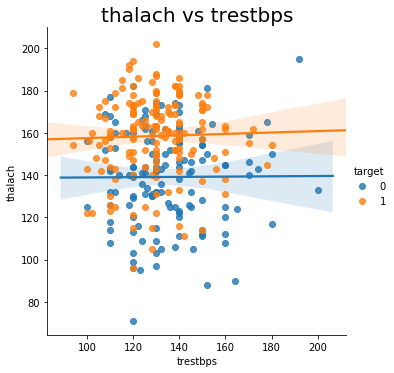

In [80]:
#Distribution of maximum Heart Rate achieved 

Thalach = sns.distplot(df['thalach'],kde=False,bins=30,color='blue')
plt.title('Maximum Heart Rate', fontsize = 20)

#
plt.figure(figsize=(8,6))
sns.lmplot(x = 'trestbps',y = 'thalach',data = df,hue = 'target')
plt.title('thalach vs trestbps', fontsize = 20)
plt.show()




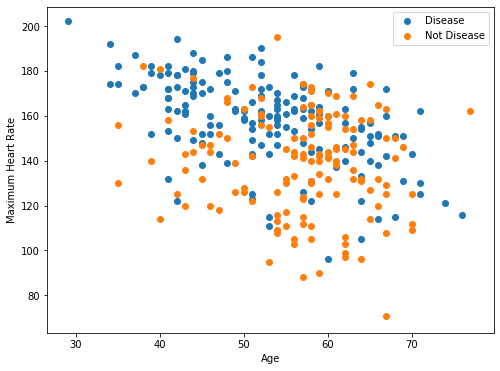

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)])
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])

plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()



In [84]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [85]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)


Logistic Regression Accuracy 86.89%


(2.0, 0.0)

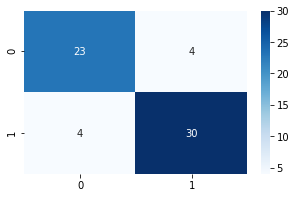

In [132]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
accuracies = {}
acc = log.score(x_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Logistic Regression Accuracy {:.2f}%".format(acc))

y_head_lr = log.predict(x_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)

plt.rcParams['figure.figsize'] = (5, 3)
df_corr = df.corr()
ax = sns.heatmap(cm_lr,annot=True,cmap="Blues") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

KNN Score: 88.52%


(2.0, 0.0)

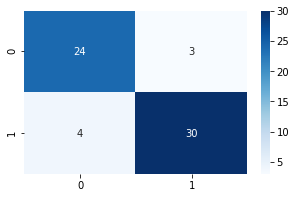

In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("KNN Score: {:.2f}%".format(knn.score(x_test, y_test)*100))

knn3 = KNeighborsClassifier(n_neighbors = 8)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)

cm_knn = confusion_matrix(y_test,y_head_knn)


plt.rcParams['figure.figsize'] = (5, 3)
df_corr = df.corr()
bx=sns.heatmap(cm_knn,annot=True,cmap="Blues")
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)

Decision Tree Test Accuracy 78.69%


(2.0, 0.0)

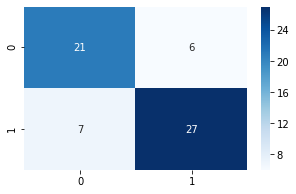

In [131]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

y_head_dtc = dtc.predict(x_test)

cm_dtc = confusion_matrix(y_test,y_head_dtc)

plt.rcParams['figure.figsize'] = (5, 3)
df_corr = df.corr()
bx=sns.heatmap(cm_dtc,annot=True,cmap="Blues")
bottom, top = bx.get_ylim()
bx.set_ylim(bottom + 0.5, top - 0.5)
